In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import json

df = pd.read_json("reddit_prescribed_burns_unclean.json")

print(df.head())

                      title  score       date  \
0            Fire on campus    150 2025-01-13   
1  fire at rose garden park      2 2024-12-08   
2       Controlled fire or?     42 2024-11-27   
3     Fire up Pattee Canyon      6 2024-11-24   
4        Fire Near The Wye?      1 2024-10-27   

                                                 url  num_comments  \
0               https://i.redd.it/tuvfw5l48uce1.jpeg            21   
1  https://www.reddit.com/r/missoula/comments/1h9...             9   
2               https://i.redd.it/hy1rs2ahmc3e1.jpeg             8   
3               https://i.redd.it/y0dd9icadw2e1.jpeg             6   
4  https://www.reddit.com/r/missoula/comments/1gd...             0   

                                            comments  \
0                       [Fires are so hot right now]   
1  [Flag retirement. https://www.facebook.com/sha...   
2  [I know there’s some prescribed burns happenin...   
3                                 [It’s burn season]   
4   

In [3]:
df.shape

(75, 7)

In [4]:
df["score"]

0     150
1       2
2      42
3       6
4       1
     ... 
70    217
71     82
72     45
73     40
74     18
Name: score, Length: 75, dtype: int64

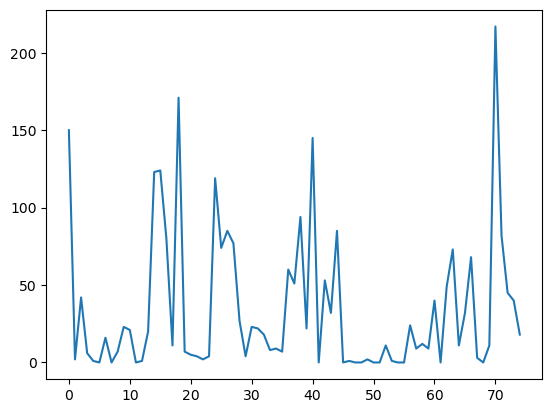

In [5]:
plt.plot(df["score"])

I think that the scores could be used as a scalar for my analysis. If the langauge proccessing analaysis says that the comment
was negative, I could apply its score value to reflect if other people aggreed or dissagreed with the negative comment. 

NOTE: Scaling would have to be done for larger populations. For example: Los Angelis will have way more points because they have way more people using reddit. Without a proper scale, places like Montana, Idaho, and Wyoming would get drowned. 



In [6]:
print(df.head)

<bound method NDFrame.head of                                                 title  score       date  \
0                                      Fire on campus    150 2025-01-13   
1                            fire at rose garden park      2 2024-12-08   
2                                 Controlled fire or?     42 2024-11-27   
3                               Fire up Pattee Canyon      6 2024-11-24   
4                                  Fire Near The Wye?      1 2024-10-27   
..                                                ...    ...        ...   
70                               Nelson speaking fire    217 2023-04-26   
71  Camper fire north of the freeway on reserve ca...     82 2023-02-27   
72  Back in 1835 my grandfather's brother Anthony ...     45 2023-01-22   
73  Bad photo but anyone know what’s up with this ...     40 2022-10-21   
74           Anyone else see the fireball in the sky?     18 2022-10-19   

                                                  url  num_comments  

In [7]:
import re

# Remove URLs from specific columns
df['title'] = df['title'].str.replace(r'http\S+|www\.\S+', '', regex=True)
df['comments'] = df['comments'].apply(lambda x: [re.sub(r'http\S+|www\.\S+', '', comment) for comment in x])
df['replies'] = df['replies'].apply(lambda x: [re.sub(r'http\S+|www\.\S+', '', reply) for reply in x])

In [8]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/joeycartwright/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
example = df['comments'][14]
print(example)

["I can see it from my house in Corvallis. That windstorm today really messed up shit from Darby to Victor. I didn't see much damage past victor."]


In [32]:
print(df["date"])

0    2025-01-13
1    2024-12-08
2    2024-11-27
3    2024-11-24
4    2024-10-27
        ...    
70   2023-04-26
71   2023-02-27
72   2023-01-22
73   2022-10-21
74   2022-10-19
Name: date, Length: 75, dtype: datetime64[ns]


In [29]:
nltk.word_tokenize(str(example))

['[',
 '``',
 'I',
 'can',
 'see',
 'it',
 'from',
 'my',
 'house',
 'in',
 'Corvallis',
 '.',
 'That',
 'windstorm',
 'today',
 'really',
 'messed',
 'up',
 'shit',
 'from',
 'Darby',
 'to',
 'Victor',
 '.',
 'I',
 'did',
 "n't",
 'see',
 'much',
 'damage',
 'past',
 'victor',
 '.',
 "''",
 ']']

In [30]:
sia = SentimentIntensityAnalyzer()

# Example comment
comment = "I love this subreddit! It's so helpful and positive."

print(str(example))

# Analyze sentiment
sentiment = sia.polarity_scores(str(example))
print(sentiment)

["I can see it from my house in Corvallis. That windstorm today really messed up shit from Darby to Victor. I didn't see much damage past victor."]
{'neg': 0.204, 'neu': 0.715, 'pos': 0.082, 'compound': -0.6032}
